<a href="https://colab.research.google.com/github/FerminMendez/ModuleAI/blob/main/DescendentGradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fermín Méndez García
A01703366

Implementación de gradiente descendiente

La idea del gradiente descendiente es que a partir de una regresión lineal y= b+ k0*x0 + k1*x1 + ... +kn*xn encontremos los valores de los coeficientes k tal que la ecuación haga una buena aproximación de los datos.


Para este primer ejemplo queremos encontrar los coeficientes x1=1, x2=1. Es decir una suma simple tal que y= x1+x2. Los datos dados serán
train_x=[[1,1],[2,2],[3,3],[4,4],[5,5]]
y=[2,4,6,8,10]

Haremos la implementación del gradiente descendiente.Con pandas

In [199]:
import pandas as pd
import numpy as np


1- Importar el data frame y cambiar los tipos de datos para asegurarnos que podemos manipularnos como queremos

In [200]:
def getDefaultDataSet(n,m):
  num_rows=n
  num_col=m
  default=np.array(range(n)).astype('float16')
  df_x=pd.DataFrame()
  default=np.array(range(n)).astype('float16')
  for i in range(num_col):
    name="x"+str(i)
    df_x[name]=default
  df_x.insert(loc = 0,column="ones",value = np.ones(num_rows).astype('float16'))
  df_y=pd.DataFrame([default*m]).T
  return [df_x,df_y]

In [201]:
def MSE(estimatedValues,realValues):
  mse = (np.square(realValues - estimatedValues)).mean()
  return mse

In [202]:
def updateParamsDesendentGradient(currentParams,df_x,df_y,alfa,periods,num_rows,num_col):
  delta=0.001
  const_alfa_m=alfa/num_rows
  errors=list()
  for p in range(periods):
    temp=currentParams
    M = df_x.dot(currentParams)
    diff=M-df_y[0]
    for i in range (num_col):
      x=diff.dot(df_x.iloc[:,i])
      temp[i]=currentParams[i]-const_alfa_m*x
    currentParamas=temp
    curr_error=(diff**2).mean()
    errors.append(curr_error)
    if(curr_error)<delta:
      print("Repeated %i times to get %f error"%(p,delta))
      break
  return [currentParams,errors]



In [203]:
[df_x,df_y]=getDefaultDataSet(5,5)
print(type(df_x))
print(df_x)
print(type(df_y))
print(df_y)




<class 'pandas.core.frame.DataFrame'>
   ones   x0   x1   x2   x3   x4
0   1.0  0.0  0.0  0.0  0.0  0.0
1   1.0  1.0  1.0  1.0  1.0  1.0
2   1.0  2.0  2.0  2.0  2.0  2.0
3   1.0  3.0  3.0  3.0  3.0  3.0
4   1.0  4.0  4.0  4.0  4.0  4.0
<class 'pandas.core.frame.DataFrame'>
      0
0   0.0
1   5.0
2  10.0
3  15.0
4  20.0


In [204]:
#MAIN PROGRAM

#Obatain the dataset
num_instances=10
num_params=3
[df_x,df_y]=getDefaultDataSet(num_instances,num_params)
currentParams=np.random.rand(num_params+1)
print(currentParams)
#currentParams=np.array([0.5,0.5, 0])
#print(type(df_x))
#print(df_x.shape)
#print(type(currentParams))

alfa = 0.003 #Learning rate
periods = 5000
num_rows = num_instances
num_col = num_params+1
[currentParams,errors] = updateParamsDesendentGradient(currentParams,df_x,df_y,alfa,periods,num_rows,num_col)
print(currentParams)
print(errors[-1])


[0.03996053 0.72554556 0.54417963 0.30260022]
Repeated 773 times to get 0.001000 error
[0.05872063 1.19833612 1.01697019 0.77539078]
0.0009998871871833694


In [205]:
#print(errors)

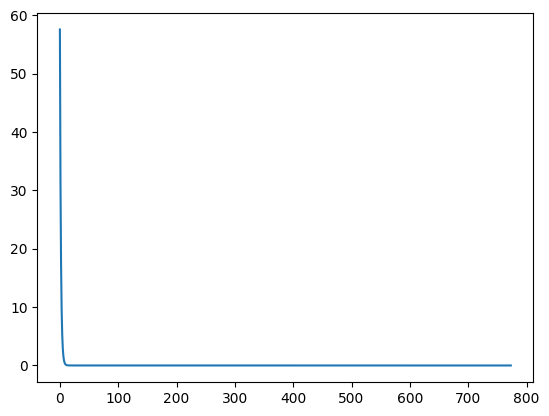

In [206]:
import matplotlib
from matplotlib.pyplot import*
plot(errors)
show()


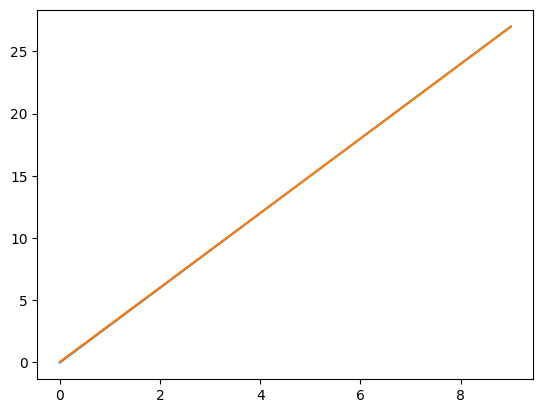

In [207]:
plot(df_y)
plot(df_x.dot(currentParams))
show()